In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

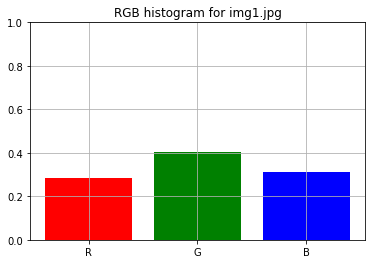

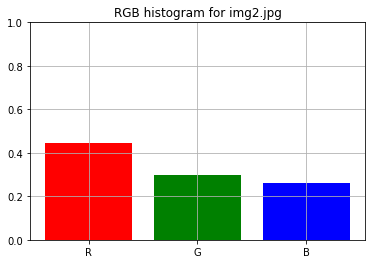

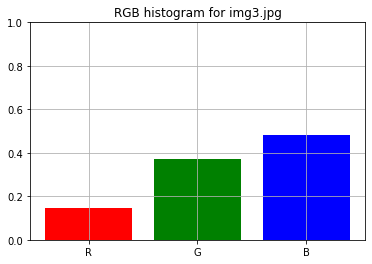

In [2]:
for i in range(1,4):
    img_bgr = cv2.imread('images/img{}.jpg'.format(i))
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    feature_rgb_total = np.sum(img_rgb,axis=(0,1))
    feature_rgb = np.array([i / np.sum(feature_rgb_total) for i in feature_rgb_total])

    plt.figure()
    plt.bar(['R','G','B'],feature_rgb,color=['red','green','blue'])
    plt.ylim(0, 1) 
    plt.grid()
    plt.title('RGB histogram for img{}.jpg'.format(i))
    plt.savefig('./feature/color/img{}.jpg'.format(i),dpi=100)

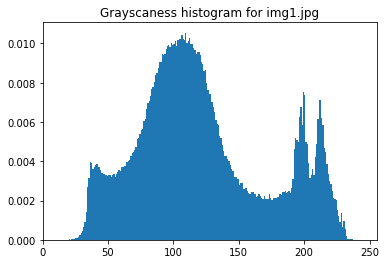

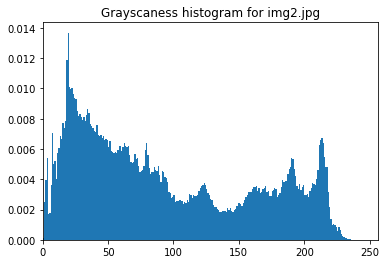

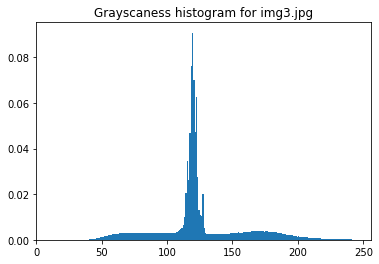

In [3]:
for i in range(1,4):
    img_gray = cv2.imread('images/img{}.jpg'.format(i),0)

    feature_gray = img_gray.flatten()

    plt.figure()
    plt.hist(feature_gray,bins=range(256),density = True)
    plt.xlim(0,256)
    plt.title('Grayscaness histogram for img{}.jpg'.format(i))
    plt.savefig('./feature/gray/img{}.jpg'.format(i),dpi=100)

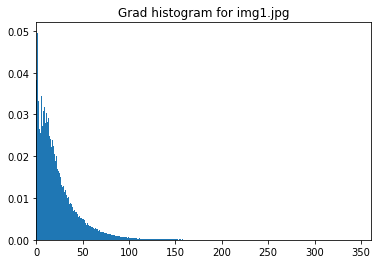

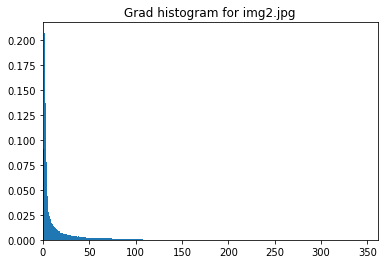

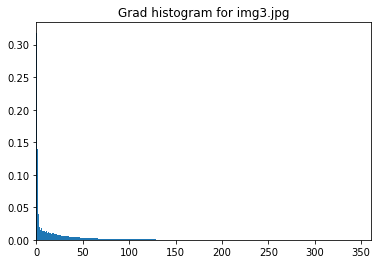

In [4]:
for i in range(1,4):
    img_gray = cv2.imread('images/img{}.jpg'.format(i),0)
    img_gray = img_gray.astype(np.float)

    hight = img_gray.shape[0]
    width = img_gray.shape[1]

    gy = np.array([img_gray[i+1,:]-img_gray[i-1,:] for i in range(1,hight-1)])[:,1:width-1]
    gx = np.array([img_gray[:,j+1]-img_gray[:,j-1] for j in range(1,width-1)])[:,1:hight-1].transpose()
    feature_grad = np.floor((gy**2 + gx**2)**0.5).flatten()


    plt.figure()
    plt.hist(feature_grad,bins=range(361),density = True)
    plt.xlim(0,361)
    plt.title('Grad histogram for img{}.jpg'.format(i))
    plt.savefig('./feature/grad/img{}.jpg'.format(i),dpi=100)

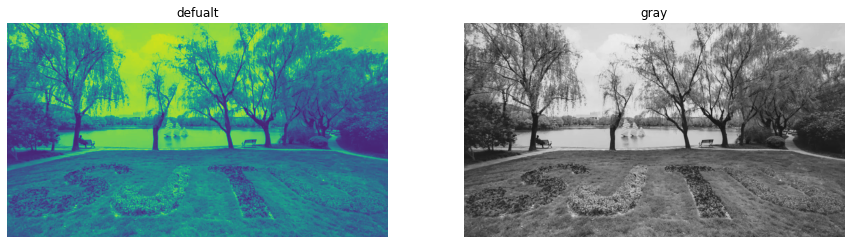

In [29]:
img_gray = cv2.imread('images/img{}.jpg'.format(1),0)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('defualt')
plt.axis('off')
plt.imshow(img_gray)
plt.subplot(122)
plt.title('gray')
plt.axis('off')
plt.imshow(img_gray,cmap="gray")
plt.savefig('comparison.jpg',bbox_inches='tight')